In [73]:
import pandas as pd
import datetime

from matplotlib import pyplot as plt
%matplotlib inline

## Import Crime Data


In [74]:
#load 8 years of data sets into dict with year as key
crime_sets = dict()
for year in range(2010,2019):
    crime_sets[str(year)] = pd.read_csv('data/crime/USA_Crime_Incidents_in_{}.csv'.format(year))

In [75]:
#check that columns are the same for each year
cols = crime_sets['2010'].columns
for cs in crime_sets:
    if(list(crime_sets[cs].columns) == list(cols)):
        print('{} SAME'.format(cs))
    print(crime_sets[cs].shape)

2010 SAME
(31675, 25)
2011 SAME
(33292, 25)
2012 SAME
(35317, 25)
2013 SAME
(35895, 25)
2014 SAME
(38438, 25)
2015 SAME
(37328, 25)
2016 SAME
(37227, 25)
2017 SAME
(33116, 25)
2018 SAME
(33782, 25)


In [76]:
crime_merged = pd.concat(crime_sets)
offense_types = list(set(crime_merged['OFFENSE']))
offense_types

['ROBBERY',
 'MOTOR VEHICLE THEFT',
 'THEFT F/AUTO',
 'SEX ABUSE',
 'BURGLARY',
 'HOMICIDE',
 'ASSAULT W/DANGEROUS WEAPON',
 'THEFT/OTHER',
 'ARSON']

In [77]:
crime_merged.head()

X          Y      CCN                REPORT_DAT     SHIFT  \
2010 0 -76.975118  38.917289   100060  2010-07-16T14:00:00.000Z       DAY   
     1 -76.988297  38.927723  4172632  2010-01-21T00:00:00.000Z  MIDNIGHT   
     2 -76.957528  38.888178  6098962  2010-08-31T00:00:00.000Z  MIDNIGHT   
     3 -77.072294  38.921513  7151899  2010-09-14T00:00:00.000Z  MIDNIGHT   
     4 -76.995239  38.925427  9016047  2010-01-12T17:50:00.000Z   EVENING   

        METHOD                     OFFENSE  \
2010 0  OTHERS                THEFT F/AUTO   
     1     GUN                    HOMICIDE   
     2     GUN                    HOMICIDE   
     3  OTHERS                    HOMICIDE   
     4  OTHERS  ASSAULT W/DANGEROUS WEAPON   

                                           BLOCK    XBLOCK    YBLOCK  ...  \
2010 0   1800 - 2299 BLOCK OF NEW YORK AVENUE NE  402158.0  138824.0  ...   
     1       HAMLIN STREET NE AND 13TH STREET NE  401015.0  139982.0  ...   
     2         100 - 199 BLOCK OF 34TH STREET SE  403685.0  135593.0  ...   
     3  2301 - 2499 BLOCK OF WISCONSIN AVENUE NW  393731.0  139295.0  ...   
     4     710 - 799 BLOCK OF EDGEWOOD STREET NE  400413.0  139727.0  ...   

        BLOCK_GROUP CENSUS_TRACT  VOTING_PRECINCT   LATITUDE  LONGITUDE  BID  \
2010 0     011100 3      11100.0      Precinct 72  38.917282 -76.975116  NaN   
     1     009302 1       9302.0      Precinct 73  38.927715 -76.988294  NaN   
     2     007708 1       7708.0     Precinct 132  38.888171 -76.957526  NaN   
     3     000300 1        300.0      Precinct 11  38.921505 -77.072292  NaN   
     4     009204 2       9204.0      Precinct 74  38.925419 -76.995237  NaN   

                      START_DATE                  END_DATE   OBJECTID  \
2010 0  2010-07-15T13:37:00.000Z  2010-07-15T13:40:00.000Z  332101471   
     1  2004-12-19T00:45:00.000Z  2004-12-19T00:50:00.000Z  332101479   
     2  2006-07-23T01:40:00.000Z  2006-07-23T01:40:00.000Z  332101483   
     3  2007-11-03T20:12:00.000Z  2007-11-03T20:15:00.000Z  332101496   
     4  2010-01-11T19:51:00.000Z                       NaN  332138320   

        OCTO_RECORD_ID  
2010 0     00100060-01  
     1     04172632-01  
     2     06098962-01  
     3     07151899-01  
     4     09016047-01  

[5 rows x 25 columns]

In [78]:
crime_merged['CRIME_DAY'] = pd.to_datetime(crime_merged['START_DATE']).dt.date


In [79]:
#remove reports of crimes outside our range of interest
crime_merged = crime_merged[pd.to_datetime(crime_merged['CRIME_DAY']) >= pd.to_datetime('2010-01-01')]

In [80]:
crime_merged.head()

X          Y       CCN                REPORT_DAT    SHIFT  \
2010 0 -76.975118  38.917289    100060  2010-07-16T14:00:00.000Z      DAY   
     4 -76.995239  38.925427   9016047  2010-01-12T17:50:00.000Z  EVENING   
     6 -76.983658  38.889239  10001331  2010-01-04T07:24:00.000Z      DAY   
     7 -76.997328  38.885141  10001335  2010-01-04T07:30:00.000Z      DAY   
     8 -77.014644  38.905022  10001337  2010-01-04T07:45:00.000Z      DAY   

        METHOD                     OFFENSE  \
2010 0  OTHERS                THEFT F/AUTO   
     4  OTHERS  ASSAULT W/DANGEROUS WEAPON   
     6  OTHERS                THEFT F/AUTO   
     7  OTHERS                    BURGLARY   
     8  OTHERS                     ROBBERY   

                                            BLOCK    XBLOCK    YBLOCK  ...  \
2010 0    1800 - 2299 BLOCK OF NEW YORK AVENUE NE  402158.0  138824.0  ...   
     4      710 - 799 BLOCK OF EDGEWOOD STREET NE  400413.0  139727.0  ...   
     6             1 - 99 BLOCK OF 15TH STREET SE  401418.0  135710.0  ...   
     7  600 - 669 BLOCK OF PENNSYLVANIA AVENUE SE  400232.0  135255.0  ...   
     8  1102 - 1179 BLOCK OF NEW JERSEY AVENUE NW  398730.0  137462.0  ...   

        CENSUS_TRACT VOTING_PRECINCT   LATITUDE  LONGITUDE  \
2010 0       11100.0     Precinct 72  38.917282 -76.975116   
     4        9204.0     Precinct 74  38.925419 -76.995237   
     6        6700.0     Precinct 88  38.889231 -76.983655   
     7        6500.0     Precinct 89  38.885133 -76.997326   
     8        4701.0      Precinct 1  38.905014 -77.014642   

                              BID                START_DATE  \
2010 0                        NaN  2010-07-15T13:37:00.000Z   
     4                        NaN  2010-01-11T19:51:00.000Z   
     6                        NaN  2010-01-03T08:00:00.000Z   
     7               CAPITOL HILL  2010-01-04T07:00:00.000Z   
     8  MOUNT VERNON TRIANGLE CID  2010-01-04T07:15:00.000Z   

                        END_DATE   OBJECTID  OCTO_RECORD_ID   CRIME_DAY  
2010 0  2010-07-15T13:40:00.000Z  332101471     00100060-01  2010-07-15  
     4                       NaN  332138320     09016047-01  2010-01-11  
     6  2010-01-04T07:00:00.000Z  332166210     10001331-01  2010-01-03  
     7  2010-01-04T07:05:00.000Z  332166211     10001335-01  2010-01-04  
     8                       NaN  332166212     10001337-01  2010-01-04  

[5 rows x 26 columns]

In [81]:
#group by day and count number of each type of offense
crime_grouped = crime_merged.groupby(by=['CRIME_DAY','OFFENSE']).agg({'CCN':'count'}).reindex()
#pivot back to make offenses columns
crime_daily = crime_grouped.unstack(-1)
crime_daily.columns= crime_daily.columns.droplevel()


In [82]:
days_df = pd.DataFrame(dict({'date':pd.date_range(start='2010/01/01',end='2018/12/31')}))
days_df.index = days_df['date']
days_df['DAY'] = days_df['date'].dt.weekday_name
days_df['MONTH'] = days_df['date'].dt.month_name()

days_df.drop('date', axis=1, inplace=True)
days_df.head()

,DAY,MONTH
date,,
2010-01-01,Friday,January
2010-01-02,Saturday,January
2010-01-03,Sunday,January
2010-01-04,Monday,January
2010-01-05,Tuesday,January


In [83]:
#join data frame to an index containing every day, so that we have rows for days where there was no crime
# first made data frame for each day
days_df = pd.DataFrame(dict({'date':pd.date_range(start='2010/01/01',end='2018/12/31')}))
days_df.index = days_df['date']
days_df['DAY'] = days_df['date'].dt.weekday_name
days_df['MONTH'] = days_df['date'].dt.month_name()

days_df.drop('date', axis=1, inplace=True)


#then join to the crime data
crime_daily = days_df.join(crime_daily, how = 'left')


#clean up NA values where there were no reported crimes
crime_daily = crime_daily.fillna(0)
crime_daily.head()

,DAY,MONTH,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER
date,,,,,,,,,,,
2010-01-01,Friday,January,0.0,10.0,9.0,0.0,10.0,3.0,0.0,17.0,28.0
2010-01-02,Saturday,January,0.0,3.0,7.0,1.0,7.0,2.0,1.0,20.0,23.0
2010-01-03,Sunday,January,0.0,5.0,2.0,0.0,11.0,7.0,0.0,15.0,8.0
2010-01-04,Monday,January,0.0,4.0,7.0,0.0,9.0,9.0,0.0,21.0,19.0
2010-01-05,Tuesday,January,0.0,3.0,12.0,0.0,5.0,9.0,1.0,20.0,20.0


In [84]:
df_unemp = pd.read_csv('data/Unemployment_rate/Complete_Unemployment1.csv')

In [85]:
df_unemp.head()

,Date,Month,Year,Area,Civilian Labor Force,Employment,Unemployment,Unemployment Rate,State FIPS Code,Area FIPS Code
0,2010-01-01,1,2010,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA","3,096,785","2,891,599","205,186",6.6,11.0,47900.0
1,2010-01-02,1,2010,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA","3,096,785","2,891,599","205,186",6.6,11.0,47900.0
2,2010-01-03,1,2010,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA","3,096,785","2,891,599","205,186",6.6,11.0,47900.0
3,2010-01-04,1,2010,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA","3,096,785","2,891,599","205,186",6.6,11.0,47900.0
4,2010-01-05,1,2010,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA","3,096,785","2,891,599","205,186",6.6,11.0,47900.0


In [86]:
df_unemp = df_unemp.set_index('Date')

In [87]:
df_unemp.head()

,Month,Year,Area,Civilian Labor Force,Employment,Unemployment,Unemployment Rate,State FIPS Code,Area FIPS Code
Date,,,,,,,,,
2010-01-01,1,2010,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA","3,096,785","2,891,599","205,186",6.6,11.0,47900.0
2010-01-02,1,2010,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA","3,096,785","2,891,599","205,186",6.6,11.0,47900.0
2010-01-03,1,2010,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA","3,096,785","2,891,599","205,186",6.6,11.0,47900.0
2010-01-04,1,2010,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA","3,096,785","2,891,599","205,186",6.6,11.0,47900.0
2010-01-05,1,2010,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA","3,096,785","2,891,599","205,186",6.6,11.0,47900.0


In [88]:
df4 = pd.merge(crime_daily, df_unemp, left_index=True, right_index=True) 


In [89]:
df4.head()

,DAY,MONTH,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER,Month,Year,Area,Civilian Labor Force,Employment,Unemployment,Unemployment Rate,State FIPS Code,Area FIPS Code
date,,,,,,,,,,,,,,,,,,,,
2010-01-01,Friday,January,0.0,10.0,9.0,0.0,10.0,3.0,0.0,17.0,28.0,1,2010,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA","3,096,785","2,891,599","205,186",6.6,11.0,47900.0
2010-01-02,Saturday,January,0.0,3.0,7.0,1.0,7.0,2.0,1.0,20.0,23.0,1,2010,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA","3,096,785","2,891,599","205,186",6.6,11.0,47900.0
2010-01-03,Sunday,January,0.0,5.0,2.0,0.0,11.0,7.0,0.0,15.0,8.0,1,2010,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA","3,096,785","2,891,599","205,186",6.6,11.0,47900.0
2010-01-04,Monday,January,0.0,4.0,7.0,0.0,9.0,9.0,0.0,21.0,19.0,1,2010,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA","3,096,785","2,891,599","205,186",6.6,11.0,47900.0
2010-01-05,Tuesday,January,0.0,3.0,12.0,0.0,5.0,9.0,1.0,20.0,20.0,1,2010,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA","3,096,785","2,891,599","205,186",6.6,11.0,47900.0


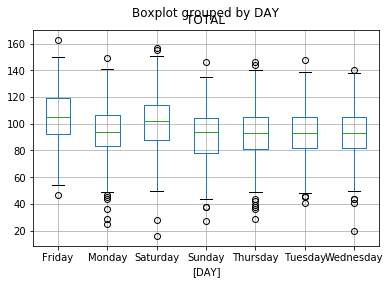

In [90]:
crime_daily['TOTAL'] = crime_daily[offense_types].sum(axis=1)
crime_daily.boxplot(column=['TOTAL'],by=['DAY'])

In [91]:
crime_daily.shape

(3287, 12)

## Import Public and School Holidays

In [92]:
# import public holidays
holidays = pd.read_csv('data/Public_Holidays/public_holidays_DC.csv')
school_holidays = pd.read_csv('data/Public_Holidays/School Holiday.csv')

In [93]:
holidays.head()

,Holiday,Date
0,New Year's Day,"Fri, 1 Jan 2010"
1,Martin Luther King Jr. Day,"Mon, 18 Jan 2010"
2,Washington's Birthday,"Mon, 15 Feb 2010"
3,Emancipation Day,"Fri, 16 Apr 2010"
4,Memorial Day,"Mon, 31 May 2010"


In [94]:
holidays.dtypes

Holiday    object
Date       object
dtype: object

In [95]:
# convert data type of date colum to datetime to allow merge using date column
holidays['Date'] = pd.to_datetime(holidays['Date'])

In [96]:
holidays.dtypes

Holiday            object
Date       datetime64[ns]
dtype: object

In [97]:
holidays.head()

,Holiday,Date
0,New Year's Day,2010-01-01
1,Martin Luther King Jr. Day,2010-01-18
2,Washington's Birthday,2010-02-15
3,Emancipation Day,2010-04-16
4,Memorial Day,2010-05-31


In [98]:
# Create dataframe for all days from 2010 to 2018

date = pd.Series(pd.date_range('2010-1-1','2018-12-31'))
holiday_df = pd.DataFrame(date)
holiday_df.head()

,0
0,2010-01-01
1,2010-01-02
2,2010-01-03
3,2010-01-04
4,2010-01-05


In [99]:
# Rename the column 0 to Date

holiday_df.rename(columns={holiday_df.columns[0]:'Date'},inplace=True)
holiday_df.head()

,Date
0,2010-01-01
1,2010-01-02
2,2010-01-03
3,2010-01-04
4,2010-01-05


In [100]:
# Merge the 2 dataframes to have a mapping of all holidays which is plotted in all the days from 2010 - 2018

holiday_df = pd.merge(holiday_df, holidays, how = 'left', left_on = ['Date'], right_on = ['Date'])
holiday_df = holiday_df.set_index('Date')
holiday_df.head()

,Holiday
Date,
2010-01-01,New Year's Day
2010-01-02,NaN
2010-01-03,NaN
2010-01-04,NaN
2010-01-05,NaN


In [101]:
holiday_df['Public Holidays'] = holiday_df['Holiday'].isnull()
holiday_df.head()

,Holiday,Public Holidays
Date,,
2010-01-01,New Year's Day,False
2010-01-02,NaN,True
2010-01-03,NaN,True
2010-01-04,NaN,True
2010-01-05,NaN,True


In [102]:
school_holidays.dtypes

Date         object
Indicator     int64
dtype: object

In [103]:
school_holidays['Date'] = pd.to_datetime(school_holidays['Date'])

In [104]:
school_holidays.dtypes

Date         datetime64[ns]
Indicator             int64
dtype: object

In [105]:
school_holidays.head()

,Date,Indicator
0,2010-01-01,1
1,2010-01-15,1
2,2010-02-12,1
3,2010-03-01,1
4,2010-03-26,1


In [106]:
holiday_df = pd.merge(holiday_df, school_holidays, how = 'left', left_on = ['Date'], right_on = ['Date'])

In [107]:
holiday_df.head()

,Date,Holiday,Public Holidays,Indicator
0,2010-01-01,New Year's Day,False,1.0
1,2010-01-02,NaN,True,NaN
2,2010-01-03,NaN,True,NaN
3,2010-01-04,NaN,True,NaN
4,2010-01-05,NaN,True,NaN


In [108]:
holiday_df['School Holidays'] = holiday_df['Indicator'].isnull()
holiday_df.head()

,Date,Holiday,Public Holidays,Indicator,School Holidays
0,2010-01-01,New Year's Day,False,1.0,False
1,2010-01-02,NaN,True,NaN,True
2,2010-01-03,NaN,True,NaN,True
3,2010-01-04,NaN,True,NaN,True
4,2010-01-05,NaN,True,NaN,True


In [109]:
holiday_df['Public Holidays'] = (~holiday_df['Public Holidays'])
holiday_df['School Holidays'] = (~holiday_df['School Holidays'])

In [110]:
holiday_df.head()

,Date,Holiday,Public Holidays,Indicator,School Holidays
0,2010-01-01,New Year's Day,True,1.0,True
1,2010-01-02,NaN,False,NaN,False
2,2010-01-03,NaN,False,NaN,False
3,2010-01-04,NaN,False,NaN,False
4,2010-01-05,NaN,False,NaN,False


## Import Weather Data

In [111]:
weather = pd.read_csv('data/Weather/washington_arboretum.csv')

In [112]:
weather.index = weather['DATE']
weather_cols = ['PRCP','SNOW','SNWD','TMAX','TMIN','TOBS']

weather = weather[weather_cols]

In [113]:
weather.head()

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS
DATE,,,,,,
2010-01-01,10.9,0.0,0.0,3.3,-4.4,3.3
2010-01-02,0.0,0.0,0.0,6.7,-3.3,-3.3
2010-01-03,0.0,0.0,0.0,-2.2,-8.9,-8.9
2010-01-04,0.0,0.0,0.0,-2.8,-8.9,-3.9
2010-01-05,0.0,0.0,0.0,0.6,-3.9,-3.3


In [114]:
weather.isna().sum()

PRCP      28
SNOW    1528
SNWD    1645
TMAX      36
TMIN      31
TOBS      15
dtype: int64

In [115]:
df_full = crime_daily.join(weather, how='left')
#need to impute some missing values using forward fill
#ie. in the event of a missing temperature, assume similar to the previous day

df_full['TMAX'].fillna(method='ffill', inplace=True)
df_full['TMIN'].fillna(method='ffill', inplace=True)

#for snow and precp, assume 0 if NaN
df_full['SNOW'].fillna(0, inplace=True)
df_full['SNWD'].fillna(0, inplace=True)
df_full['PRCP'].fillna(0, inplace=True)

In [116]:
df_full.isna().sum()

DAY                            0
MONTH                          0
ARSON                          0
ASSAULT W/DANGEROUS WEAPON     0
BURGLARY                       0
HOMICIDE                       0
MOTOR VEHICLE THEFT            0
ROBBERY                        0
SEX ABUSE                      0
THEFT F/AUTO                   0
THEFT/OTHER                    0
TOTAL                          0
PRCP                           0
SNOW                           0
SNWD                           0
TMAX                           0
TMIN                           0
TOBS                          70
dtype: int64

In [117]:
#one hot encode days of week and month
df_full = df_full.join(pd.get_dummies(df_full['DAY']), how='left')
df_full = df_full.join(pd.get_dummies(df_full['MONTH']), how='left')
df_full.head()

,DAY,MONTH,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,...,December,February,January,July,June,March,May,November,October,September
date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,Friday,January,0.0,10.0,9.0,0.0,10.0,3.0,0.0,17.0,...,0,0,1,0,0,0,0,0,0,0
2010-01-02,Saturday,January,0.0,3.0,7.0,1.0,7.0,2.0,1.0,20.0,...,0,0,1,0,0,0,0,0,0,0
2010-01-03,Sunday,January,0.0,5.0,2.0,0.0,11.0,7.0,0.0,15.0,...,0,0,1,0,0,0,0,0,0,0
2010-01-04,Monday,January,0.0,4.0,7.0,0.0,9.0,9.0,0.0,21.0,...,0,0,1,0,0,0,0,0,0,0
2010-01-05,Tuesday,January,0.0,3.0,12.0,0.0,5.0,9.0,1.0,20.0,...,0,0,1,0,0,0,0,0,0,0


In [118]:
unemployment = pd.read_csv('data/Unemployment_rate/Complete_unemp.csv')

In [119]:
unemployment.head()

,Date,labor force,employment,unemployment,unemployment rate,Area
0,2010-01-01,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M..."
1,2010-01-02,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M..."
2,2010-01-03,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M..."
3,2010-01-04,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M..."
4,2010-01-05,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M..."


In [120]:
unemployment.dtypes

Date                  object
labor force            int64
employment             int64
unemployment           int64
unemployment rate    float64
Area                  object
dtype: object

In [121]:
unemployment['Date'] = pd.to_datetime(unemployment['Date'])

In [122]:
unemployment.dtypes

Date                 datetime64[ns]
labor force                   int64
employment                    int64
unemployment                  int64
unemployment rate           float64
Area                         object
dtype: object

In [123]:
holiday_unemp_merge = pd.merge(holiday_df, unemployment, how = 'left', left_on = ['Date'], right_on = ['Date'])

In [124]:
holiday_unemp_merge.head()

,Date,Holiday,Public Holidays,Indicator,School Holidays,labor force,employment,unemployment,unemployment rate,Area
0,2010-01-01,New Year's Day,True,1.0,True,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M..."
1,2010-01-02,NaN,False,NaN,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M..."
2,2010-01-03,NaN,False,NaN,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M..."
3,2010-01-04,NaN,False,NaN,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M..."
4,2010-01-05,NaN,False,NaN,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M..."


In [125]:
holiday_unemp_merge = holiday_unemp_merge.set_index('Date')
holiday_unemp_merge.head()

,Holiday,Public Holidays,Indicator,School Holidays,labor force,employment,unemployment,unemployment rate,Area
Date,,,,,,,,,
2010-01-01,New Year's Day,True,1.0,True,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M..."
2010-01-02,NaN,False,NaN,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M..."
2010-01-03,NaN,False,NaN,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M..."
2010-01-04,NaN,False,NaN,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M..."
2010-01-05,NaN,False,NaN,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M..."


In [126]:
All_Four_Datasets = pd.merge(holiday_unemp_merge, df_full, left_index=True, right_index=True)

In [127]:
All_Four_Datasets.head()

,Holiday,Public Holidays,Indicator,School Holidays,labor force,employment,unemployment,unemployment rate,Area,DAY,...,December,February,January,July,June,March,May,November,October,September
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,New Year's Day,True,1.0,True,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Friday,...,0,0,1,0,0,0,0,0,0,0
2010-01-02,NaN,False,NaN,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Saturday,...,0,0,1,0,0,0,0,0,0,0
2010-01-03,NaN,False,NaN,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Sunday,...,0,0,1,0,0,0,0,0,0,0
2010-01-04,NaN,False,NaN,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Monday,...,0,0,1,0,0,0,0,0,0,0
2010-01-05,NaN,False,NaN,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Tuesday,...,0,0,1,0,0,0,0,0,0,0


In [128]:
All_Four_Datasets.loc[All_Four_Datasets['DAY'] == "Friday", "Payday"] = True
All_Four_Datasets.loc[All_Four_Datasets['DAY'] == "Wednesday", "Payday"] = True
All_Four_Datasets.loc[All_Four_Datasets['DAY'] == "Monday", "Payday"] = False
All_Four_Datasets.loc[All_Four_Datasets['DAY'] == "Tuesday", "Payday"] = False
All_Four_Datasets.loc[All_Four_Datasets['DAY'] == "Thursday", "Payday"] = False
All_Four_Datasets.loc[All_Four_Datasets['DAY'] == "Saturday", "Payday"] = False
All_Four_Datasets.loc[All_Four_Datasets['DAY'] == "Sunday", "Payday"] = False

In [129]:
All_Four_Datasets

,Holiday,Public Holidays,Indicator,School Holidays,labor force,employment,unemployment,unemployment rate,Area,DAY,...,February,January,July,June,March,May,November,October,September,Payday
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,New Year's Day,True,1.0,True,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Friday,...,0,1,0,0,0,0,0,0,0,True
2010-01-02,NaN,False,NaN,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Saturday,...,0,1,0,0,0,0,0,0,0,False
2010-01-03,NaN,False,NaN,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Sunday,...,0,1,0,0,0,0,0,0,0,False
2010-01-04,NaN,False,NaN,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Monday,...,0,1,0,0,0,0,0,0,0,False
2010-01-05,NaN,False,NaN,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Tuesday,...,0,1,0,0,0,0,0,0,0,False
2010-01-06,NaN,False,NaN,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Wednesday,...,0,1,0,0,0,0,0,0,0,True
2010-01-07,NaN,False,NaN,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Thursday,...,0,1,0,0,0,0,0,0,0,False
2010-01-08,NaN,False,NaN,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Friday,...,0,1,0,0,0,0,0,0,0,True
2010-01-09,NaN,False,NaN,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Saturday,...,0,1,0,0,0,0,0,0,0,False


In [130]:
All_Four_Datasets.columns

Index(['Holiday', 'Public Holidays', 'Indicator', 'School Holidays',
       'labor force', 'employment', 'unemployment', 'unemployment rate',
       'Area', 'DAY', 'MONTH', 'ARSON', 'ASSAULT W/DANGEROUS WEAPON',
       'BURGLARY', 'HOMICIDE', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'SEX ABUSE',
       'THEFT F/AUTO', 'THEFT/OTHER', 'TOTAL', 'PRCP', 'SNOW', 'SNWD', 'TMAX',
       'TMIN', 'TOBS', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'April', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Payday'],
      dtype='object')

In [131]:
All_Four_Datasets['unemployment rate'].isna().sum()

0

In [132]:
export_csv = All_Four_Datasets.to_csv (r"data\\Complete_Data\\All_Four_Datasets.csv", index = True, header=True)


## Preliminary Model Fitting Tests

In [139]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

predictors = ['Public Holidays','School Holidays','Payday','PRCP','SNOW','TMAX','TMIN','Friday','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday','December','February','January','July','June','March', 'April','May','November','October','August','September' ]
target = 'TOTAL'

In [140]:
train, test = train_test_split(All_Four_Datasets, test_size=0.2, random_state=111)

In [141]:
x_train= train[predictors]
y_train= train[target]
x_test= test[predictors]
y_test= test[target]
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [142]:
print("train scores: ", reg.score(x_train,y_train))
print("test scores: ", reg.score(x_test,y_test))

train scores:  0.385913552815471
test scores:  0.3772924121830463


In [143]:
tree_reg1 = DecisionTreeRegressor(max_depth=5)
tree_reg1.fit(x_train, y_train)
print("train scores: ", tree_reg1.score(x_train,y_train))
print("test scores: ", tree_reg1.score(x_test,y_test))

train scores:  0.36208066805343286
test scores:  0.2978763000533218


In [138]:
test.head()

,Holiday,Public Holidays,Indicator,School Holidays,labor force,employment,unemployment,unemployment rate,Area,DAY,...,February,January,July,June,March,May,November,October,September,Payday
Date,,,,,,,,,,,,,,,,,,,,,
2012-03-14,NaN,False,NaN,False,3219410,3028905,190505,5.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Wednesday,...,0,0,0,0,1,0,0,0,0,True
2016-02-22,NaN,False,1.0,True,3292530,3158530,134000,4.1,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Monday,...,1,0,0,0,0,0,0,0,0,False
2015-02-22,NaN,False,NaN,False,3258942,3100233,158709,4.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Sunday,...,1,0,0,0,0,0,0,0,0,False
2012-10-10,NaN,False,NaN,False,3262105,3081118,180987,5.5,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Wednesday,...,0,0,0,0,0,0,0,1,0,True
2017-05-20,NaN,False,NaN,False,3367911,3244506,123405,3.7,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Saturday,...,0,0,0,0,0,1,0,0,0,False
